# Project on Absenteeism of employees at Work

## Contents
### Introduction
### Data Preprocessing
### Cleaning the data
### Exploratory Analysis
### Feature selection
### Feature Scaling
### Building the model

# Introduction

> XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism.
> Dataset Characteristics: Timeseries Multivariant
Number of Attributes: 21
Missing Values : Yes

> Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21
categories (I to XXI) as follows:

I Certain infectious and parasitic diseases

II Neoplasms

III Diseases of the blood and blood-forming organs and certain disorders involving the
immune mechanism

IV Endocrine, nutritional and metabolic diseases

V Mental and behavioural disorders

VI Diseases of the nervous system

VII Diseases of the eye and adnexa

VIII Diseases of the ear and mastoid process

IX Diseases of the circulatory system

X Diseases of the respiratory system

XI Diseases of the digestive system


XII Diseases of the skin and subcutaneous tissue

XIII Diseases of the musculoskeletal system and connective tissue

XIV Diseases of the genitourinary system

XV Pregnancy, childbirth and the puerperium

XVI Certain conditions originating in the perinatal period

XVII Congenital malformations, deformations and chromosomal abnormalities

XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

XIX Injury, poisoning and certain other consequences of external causes

XX External causes of morbidity and mortality

XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood
donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27),
dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

> Loaing the dataset in google colab for processing

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Reading the excel data into a pandas dataframe
df=pd.read_excel('Absenteeism_at_work_Project.xls',sheet_name='Absenteeism_at_work')

In [3]:
# Information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [4]:
# Creating a copy of the dataset
df_new=df.copy()

In [5]:
# First few lines of the dataframe
df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0


In [6]:
# Descriptive statistics of the dataset
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Data Pre-processing

In [7]:
# Function for imputation using mean value.
def mean(t,j):
    z=t
    z.iloc[0,j]=np.NaN
    z=z.iloc[:,j].fillna(z.iloc[:,j].mean())
    return(z[0])

In [8]:
# Function for imputation using median value.
def median(t,j):
    z=t
    z.iloc[0,j]=np.NaN
    z=z.iloc[:,j].fillna(z.iloc[:,j].median())
    return(z[0])

In [9]:
# Function for imputing the missing values.
# Here we have first stored a non null value of a particular column stored it in a separate variable and replaced it in the dataframe with nan.
# Then we have imputed the missing value using the mean and median and depending upon which method imputes the value closes to the actual value is used for imputing the missing values in the dataset.
def impute(t):
    for j in range(1,21):
            if(sum(t.iloc[:,j].isnull())!=0):
                p=mean(t,j)
                q=median(t,j)
                if(abs(p-t.iloc[0,j]) < abs(q-t.iloc[0,j])):
                    t.iloc[:,j]=t.iloc[:,j].fillna(t.iloc[:,j].mean())
                else:
                    t.iloc[:,j]=t.iloc[:,j].fillna(t.iloc[:,j].median())
            else:
                continue
    return(t)      


In [10]:

# Storing the imputed dataframe in a new variable
df1=impute(df)

In [11]:
# Checking for above imputing operation
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null float64
Month of absence                   740 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null float64
Education                          740 non-null float64
Son                                740 non-null float64
Social drinker                     740 non-null float64
Social smoker                      740 non-null float64
Pet  

> As the columns ID,Reason for absence,Month of absence,Day of the week,Seasons,Education,Pet,Son,Social smoker,Social drinker contain integer type of values and are categorical variables so defining them as int type.

In [12]:
df1['ID']=df1['ID'].astype(int)
df1['Reason for absence']=df1['Reason for absence'].astype(int)
df1['Month of absence']=df1['Month of absence'].astype(int)
df1['Education']=df1['Education'].astype(int)
df1['Social drinker']=df1['Social drinker'].astype(int)
df1['Social smoker']=df1['Social smoker'].astype(int)
df1['Day of the week']=df1['Day of the week'].astype(int)
df1['Seasons']=df1['Seasons'].astype(int)
df1['Disciplinary failure']=df1['Disciplinary failure'].astype(int)
df1['Pet']=df1['Pet'].astype(int)
df1['Son']=df1['Son'].astype(int)

In [13]:
# Validating the above operation
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int32
Reason for absence                 740 non-null int32
Month of absence                   740 non-null int32
Day of the week                    740 non-null int32
Seasons                            740 non-null int32
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null int32
Education                          740 non-null int32
Son                                740 non-null int32
Social drinker                     740 non-null int32
Social smoker                      740 non-null int32
Pet                

In [14]:
df1.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,23,6,3,1,225.0,26.0,13.0,37.0,264249.0,...,0,1,1,1,0,0,83.0,170.0,25.0,3.0
1,36,0,7,3,1,118.0,13.0,18.0,50.0,239554.0,...,1,1,1,1,0,0,98.0,178.0,31.0,0.0
2,3,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0,1,0,0,89.0,170.0,31.0,2.0


> As it was said by the support team that average work load / day variable which is having very very high values won't convey anything so we need to divide it by 1000. so dividing the entire column by 1000.

In [15]:
df1['Work load Average/day ']=df1['Work load Average/day ']/1000

In [16]:
df1.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,23,6,3,1,225.0,26.0,13.0,37.0,264.249,...,0,1,1,1,0,0,83.0,170.0,25.0,3.0
1,36,0,7,3,1,118.0,13.0,18.0,50.0,239.554,...,1,1,1,1,0,0,98.0,178.0,31.0,0.0
2,3,23,7,4,1,179.0,51.0,18.0,38.0,239.554,...,0,1,0,1,0,0,89.0,170.0,31.0,2.0


In [17]:
df1['Month of absence'].value_counts()

3     87
2     72
10    70
7     66
5     64
11    63
6     56
8     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

> As month index is starting from zero so index of 12 is absurd,it might be due to rounding off so replacing 12 with eleven everwhere.

In [18]:
df1['Month of absence'][df1['Month of absence'] == 12]=11

D:\Work\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1['Month of absence'].value_counts()

11    112
3      87
2      72
10     70
7      66
5      64
6      56
8      54
9      53
4      53
1      50
0       3
Name: Month of absence, dtype: int64

In [20]:
# Converting all the categorical columns to string type.
df1['ID']=df1['ID'].astype(str)
df1['Reason for absence']=df1['Reason for absence'].astype(str)
df1['Month of absence']=df1['Month of absence'].astype(str)
df1['Education']=df1['Education'].astype(str)
df1['Social drinker']=df1['Social drinker'].astype(str)
df1['Social smoker']=df1['Social smoker'].astype(str)
df1['Day of the week']=df1['Day of the week'].astype(str)
df1['Seasons']=df1['Seasons'].astype(str)
df1['Disciplinary failure']=df1['Disciplinary failure'].astype(str)
df1['Pet']=df1['Pet'].astype(str)
df1['Son']=df1['Son'].astype(str)

In [21]:
# Validating the above operation
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

## Exploratory Data Analysis

> Below histograms of all continuous variables have been drawn so as to get a glimpse of their distribution and also presence of outliers.

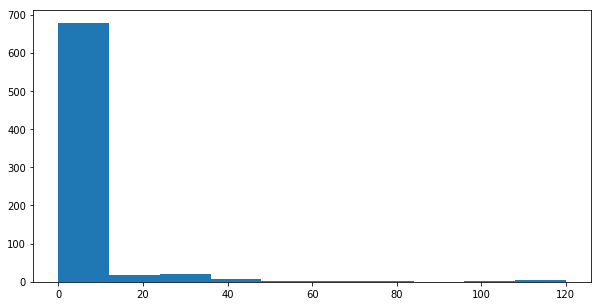

In [22]:
plt.figure(figsize=[10,5])
plt.hist(x='Absenteeism time in hours',data=df1);

> The above figure shows distribution of absenteeism time in hours of the employees. It clearly shows that majority of the employees have absenteeism hours within 10 approximately. There are some outliers present which duration of more than 20 and few of the employees have absenteeism hours upto 120. it clealry indicates the presence of outliers in this variable.

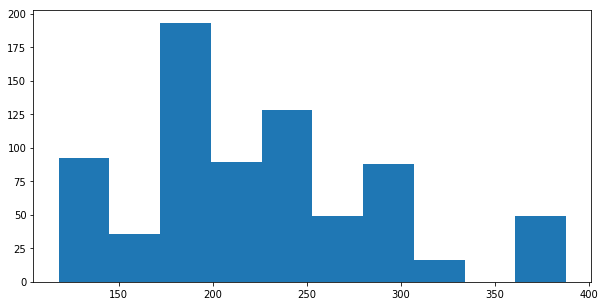

In [23]:
plt.figure(figsize=[10,5])
plt.hist(x='Transportation expense',data=df1);

> In the above histogram distribution of transportation expense is plotted. It shows that majority of employees have transportation expense between 150 and 300. Also a bar between 350 and 400 clearly depicts presence of outliers in it.

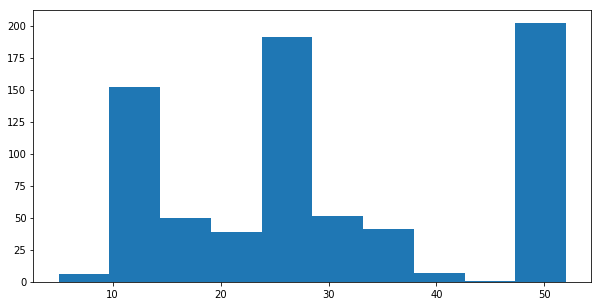

In [24]:
plt.figure(figsize=[10,5])
plt.hist(x='Distance from Residence to Work',data=df1);

> The above figure shows distribution of distance from residence to work of employees. There are three peak bars between around 10,26 and 50km approximately,which shows that majority of employees have distance in around these.

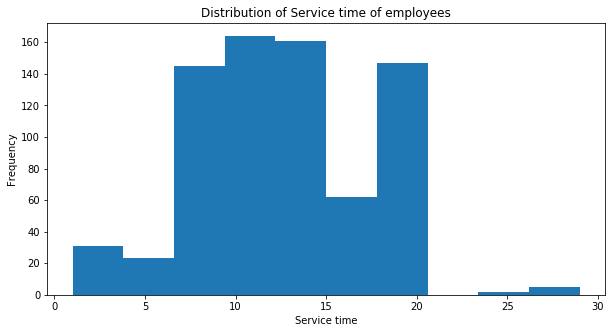

In [25]:
plt.figure(figsize=[10,5])
plt.hist(x='Service time',data=df1)
plt.title('Distribution of Service time of employees')
plt.xlabel('Service time')
plt.ylabel('Frequency');

> The above histogram shows distribution of service time of employees i.e. for how long they have been working in the company.Majority of the employees are those who have served for more than 5 years upto 20 years. Also there are some old employees who have served for more than 25 years.

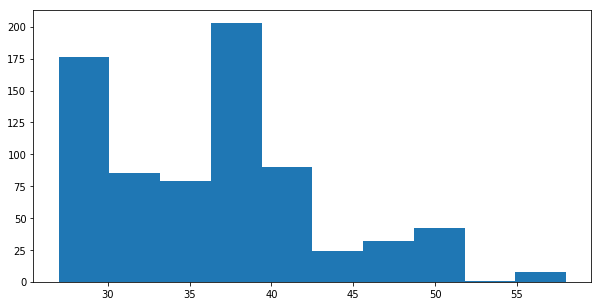

In [26]:
plt.figure(figsize=[10,5])
plt.hist(x='Age',data=df1);

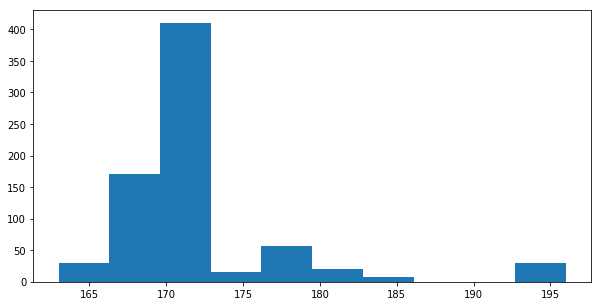

In [27]:
plt.figure(figsize=[10,5])
plt.hist(x='Height',data=df1);

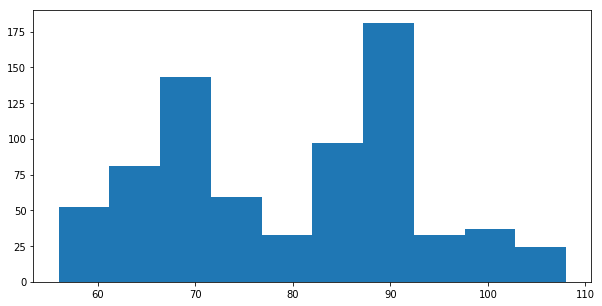

In [28]:
plt.figure(figsize=[10,5])
plt.hist(x='Weight',data=df1);

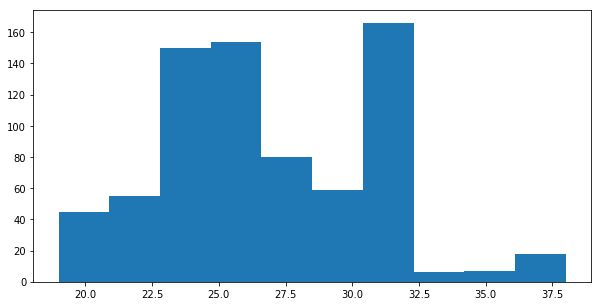

In [29]:
plt.figure(figsize=[10,5])
plt.hist(x='Body mass index',data=df1);

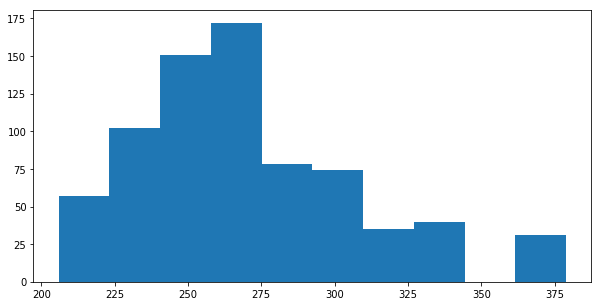

In [30]:
plt.figure(figsize=[10,5])
plt.hist(x='Work load Average/day ',data=df1);

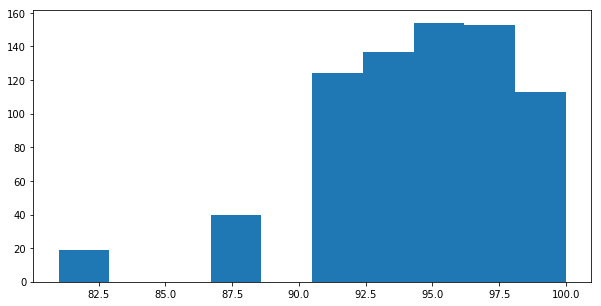

In [31]:
plt.figure(figsize=[10,5])
plt.hist(x='Hit target',data=df1);

> Below is plotted pie charts for the various categorical variables present in the dataframe.

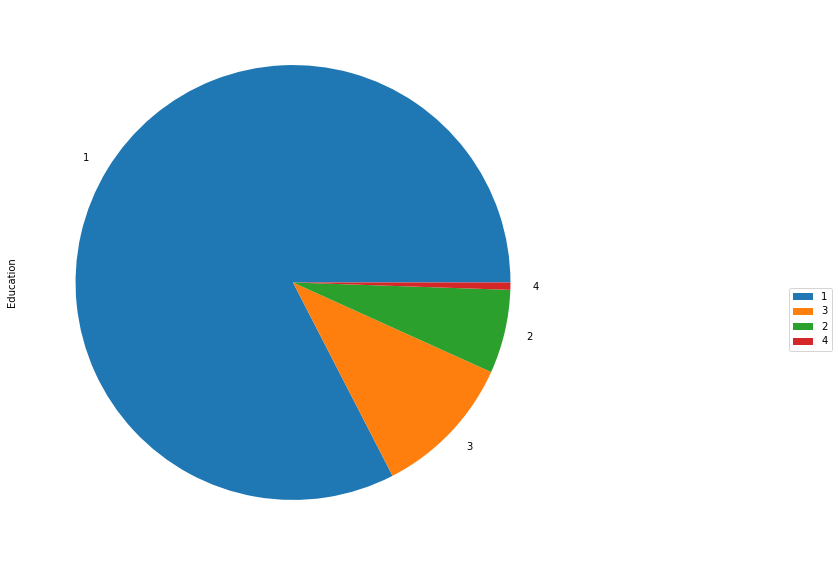

In [32]:
k=df1['Education'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> Above Pie-chart is for Education categorical variable. It shows that majority of employees in the dataset belong to education level category 1 i.e. high school,followed by 3 which is post graduate.

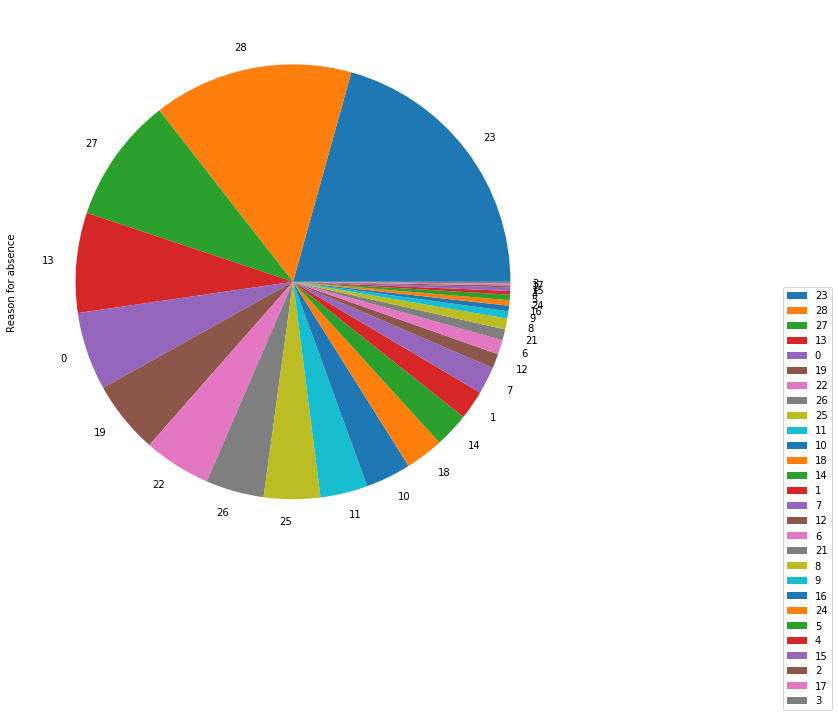

In [33]:
k=df1['Reason for absence'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> Above figure shows distribution of different reasons of absence made by employees in the dataset. It is clear that most of them have the reason for absence belonging to category 23(medical consultation) followed by 28(dental consultation) and 27(physiotherapy) which is not in the international code of diseases. Rather if the company introduces a scheme of medical checkup annually for all of its employees it may help reduce absenteeism of employees.

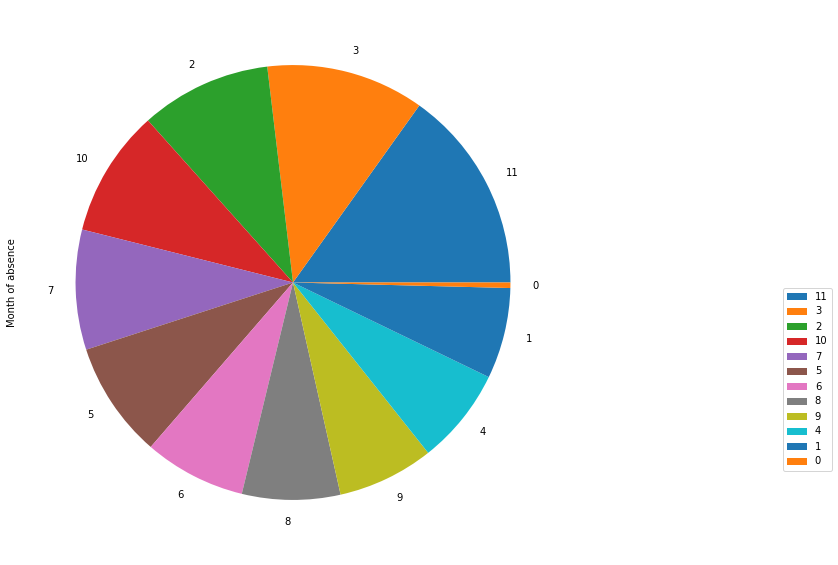

In [34]:
k=df1['Month of absence'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> Above figure depicts month of absence of the employees where month 11 i.e. 
December is majority followed by month 3 i.e. April. Also month 0 i.e. January has the minimum contribution in the dataset which means very few employees are absent in this month.
Note- As the month no is starting from 0 here so assuming January to be index 0 and so on. 

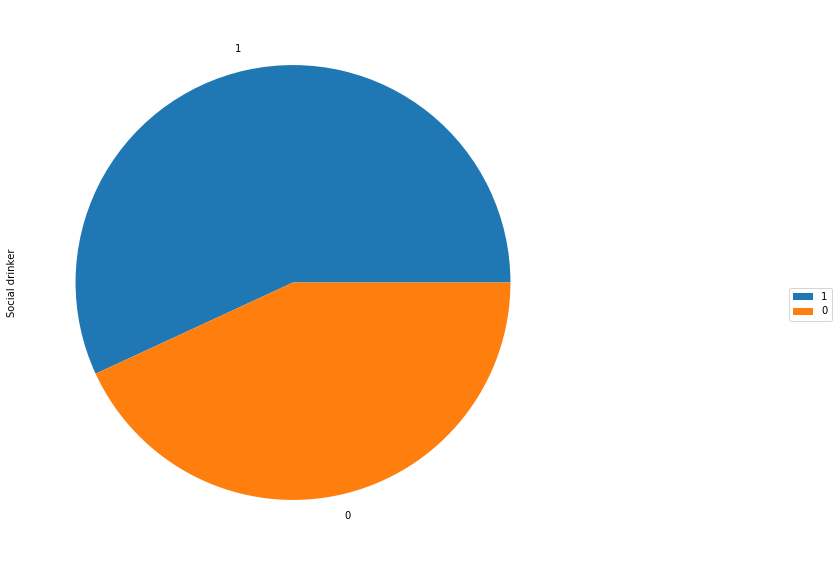

In [35]:
k=df1['Social drinker'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> Pie-chart above shows distribution of employees who are social drinker in the daatset. It is clear that majority of employees are social drinker. Thus company should be quite cautious while hiring new employees and ensure that they are not social drinkers.

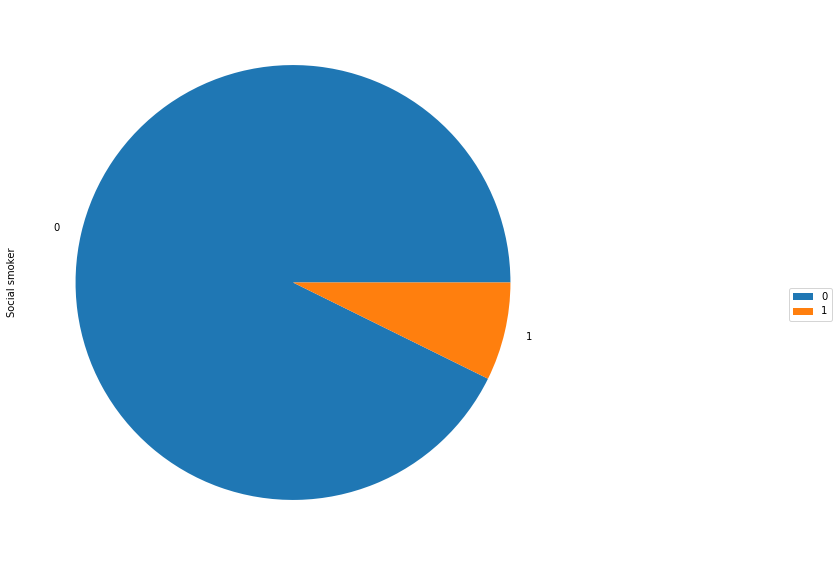

In [36]:
k=df1['Social smoker'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> From the pie-chart above it is clear that employees who don't smoke have major contribution in the dataset.

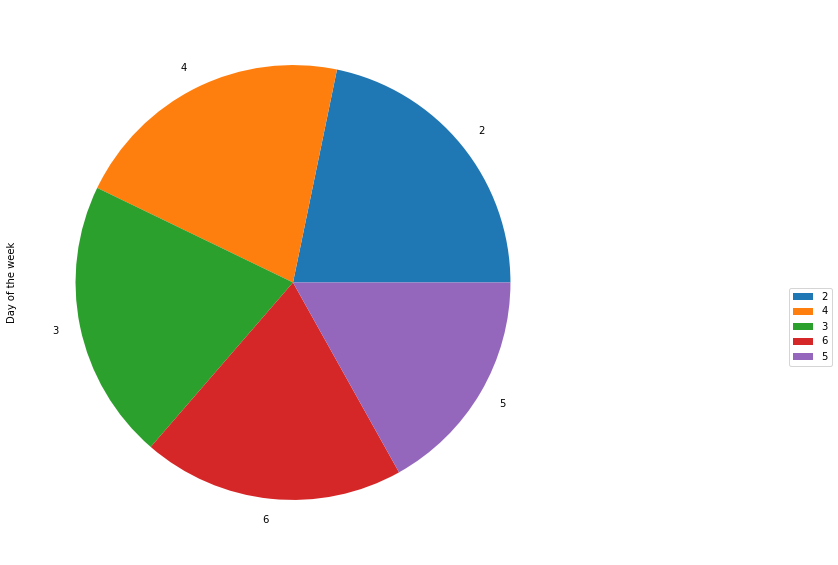

In [37]:
k=df1['Day of the week'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> The pie-chart above shows distribution of day of the week on which an employee is absent. From the chart it is quite clear that each day has approximately same contribution in the dataset.

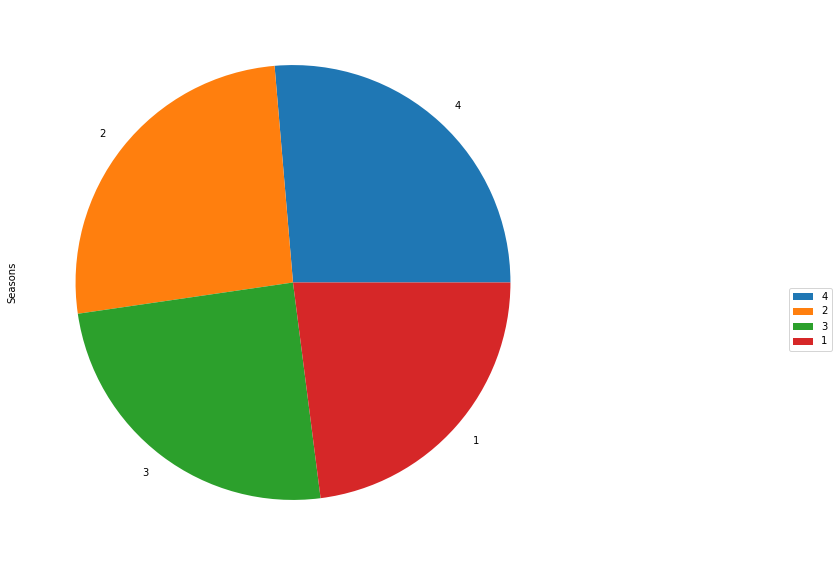

In [38]:
k=df1['Seasons'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> In the above figure distribution of various seasons in the dataset is shown. From the figure it apperars that almost all four seasons have same contribution in the dataset, a bar graph in comparison with sum of absenteeism hours would give a clear information.

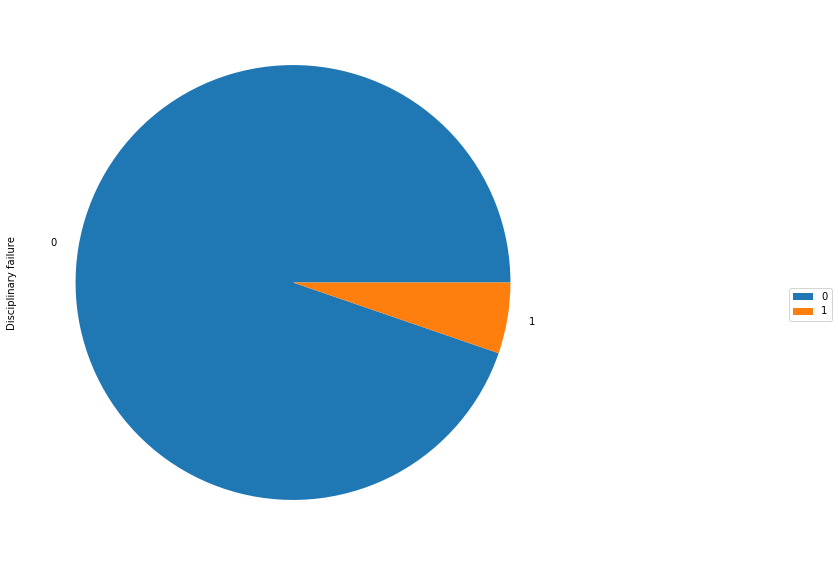

In [39]:
k=df1['Disciplinary failure'].value_counts()
k.plot(kind='pie',figsize=(20,10),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

> The above figure for disciplinary failure shows that majority of the employees are well disciplined. This fact may be quite confusing for the company because we look for negative traits in the employees but here it absolutely reverse.

In [40]:
# List of continuous variables
cnames=['Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target','Weight',
        'Height', 'Body mass index']

### Outlier Analysis Using Capping and Flooring method
> Here we have defined outliers as some value which is greater than q75+1.5*iqr or less than q25-1.5*iqr, where q75,q25 is the 75th and 25th percentile of the given continnuous variable,iqr the inter-quartile range of that variable.

> In the flooring and capping method of outliers analysis we replace those values exceeding q75+1.5*iqr with q75+1.5*iqr and those below q25-1.5*iqr with q25-1.5*iqr.

In [41]:
# Storing into a new variable.
d1=df1

Text(0, 0.5, 'Values')

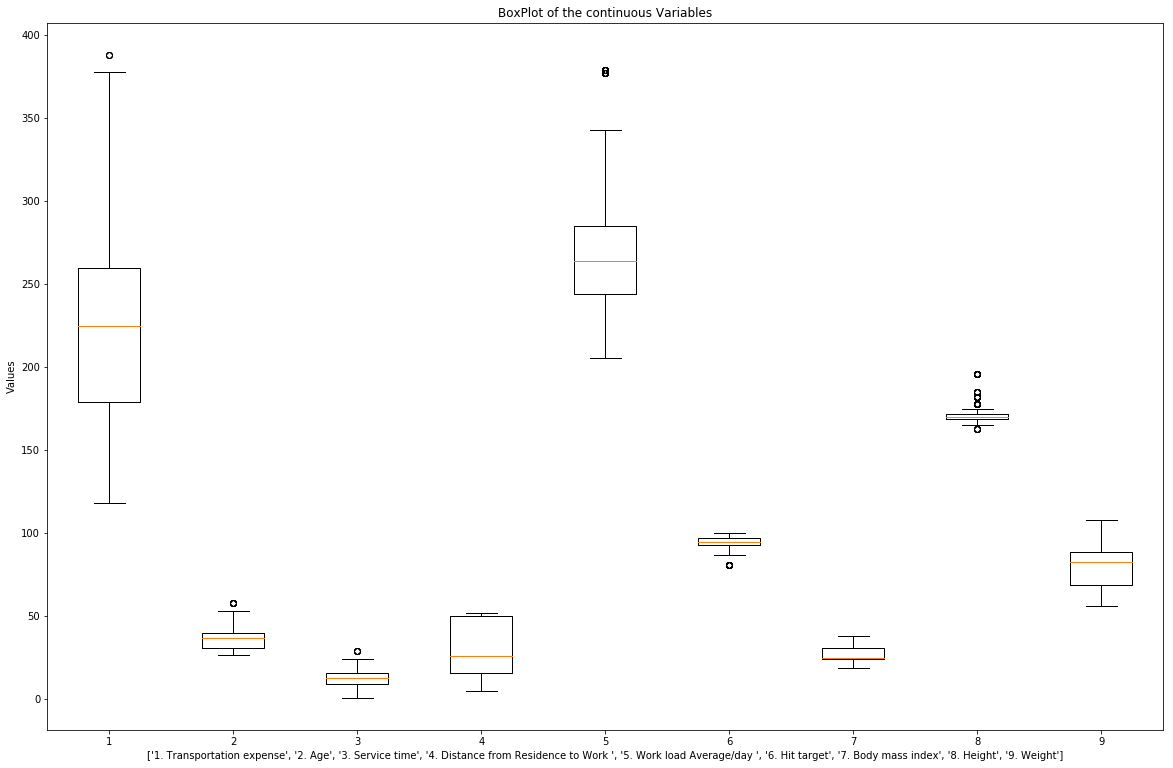

In [42]:
# Analysing each continuous variable for presence of outliers using boxplot.
plt.figure(figsize=[20,13])
plt.boxplot([df1['Transportation expense'],df1['Age'],df1['Service time'],df1['Distance from Residence to Work'],df1['Work load Average/day ']
            ,df1['Hit target'],df1['Body mass index'],df1['Height'],df1['Weight']])
plt.xlabel(['1. Transportation expense', '2. Age', '3. Service time', '4. Distance from Residence to Work ', '5. Work load Average/day ', '6. Hit target','7. Body mass index','8. Height','9. Weight'])
plt.title("BoxPlot of the continuous Variables")
plt.ylabel('Values')

> The figure above clearly shows that variables transportation expense,age,service time,work load average/day,hit target and height all have outliers some in the upper half and some in the lower half.

In [43]:
# Defining function for removing outliers.
def outlier_analysis(t,c):
    q75,q25=np.percentile(t[c],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    for i in range(t.shape[0]):
        if(t.loc[i,c] > max):
            t.loc[i,c]=max
        elif(t.loc[i,c] < min):
            t.loc[i,c]=min  
    return(t)    

In [44]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

In [45]:
# Checking the list of continuous variables
cnames

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index']

In [46]:
# Creating a list of variables having outliers.
out_var=['Transportation expense','Service time','Age','Work load Average/day ','Hit target','Height']

In [47]:
# Removing outliers using flooring and capping method from the given dataset.
for i in out_var:
    d1=outlier_analysis(d1,i)

In [48]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

D:\Work\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Work\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Work\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Work\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warn

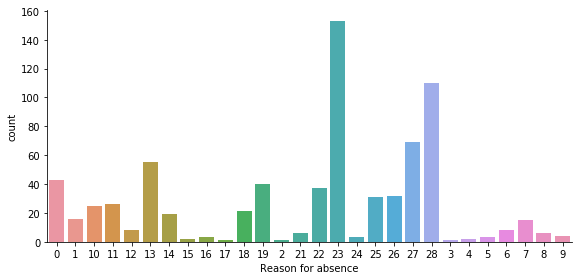

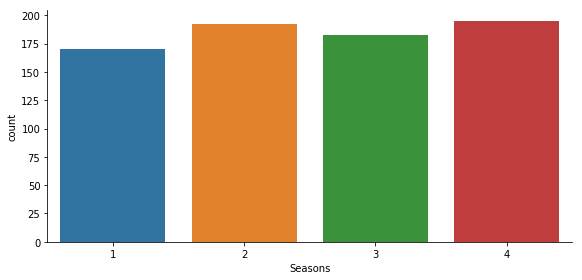

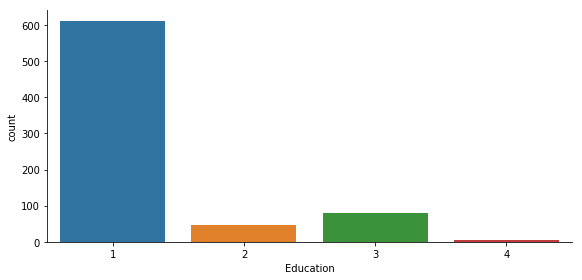

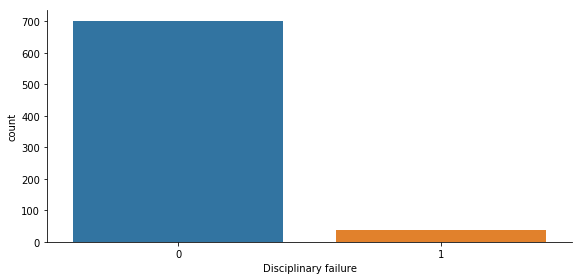

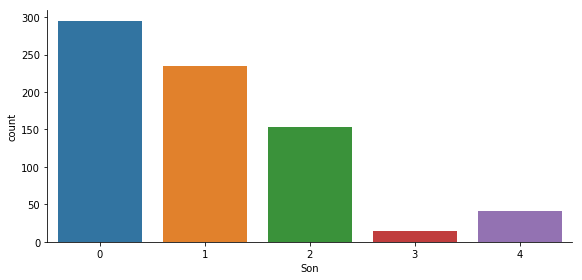

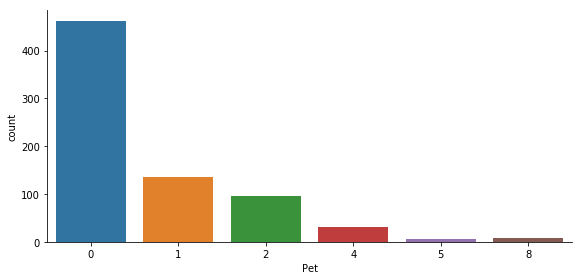

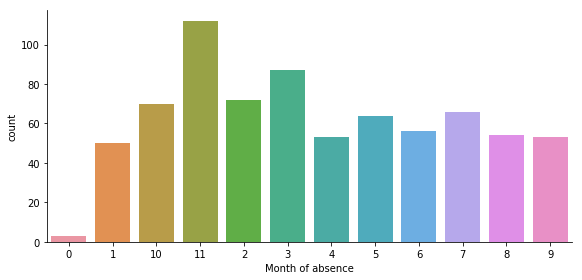

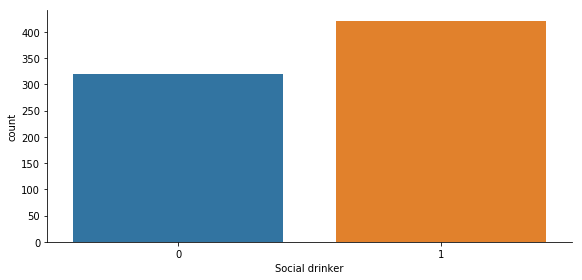

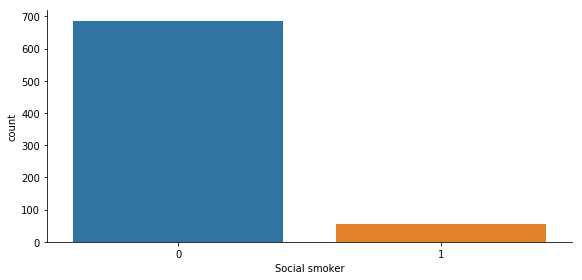

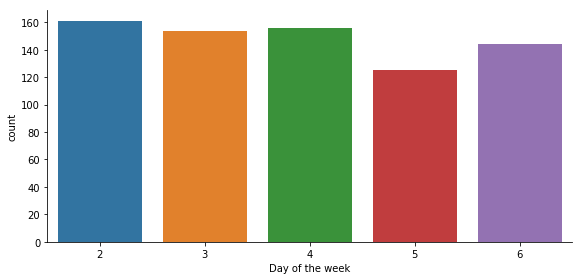

In [49]:
# Creating countplot for each categorical variable as it depicts the count of each of the categories of a categorical variable.
sb.factorplot(data=d1, x='Reason for absence', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Seasons', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Education', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Disciplinary failure', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Son', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Pet', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Month of absence', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Social drinker', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Social smoker', kind= 'count',size=4,aspect=2)
sb.factorplot(data=d1, x='Day of the week', kind= 'count',size=4,aspect=2);

> In the figure above numerous barplots have been plotted for different categorical variables.
> From the graph of reason for absence it is clear that majority of the employees have reason 23 as their reason for absence followed by reason 27.
> In the barplot for 

D:\Work\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


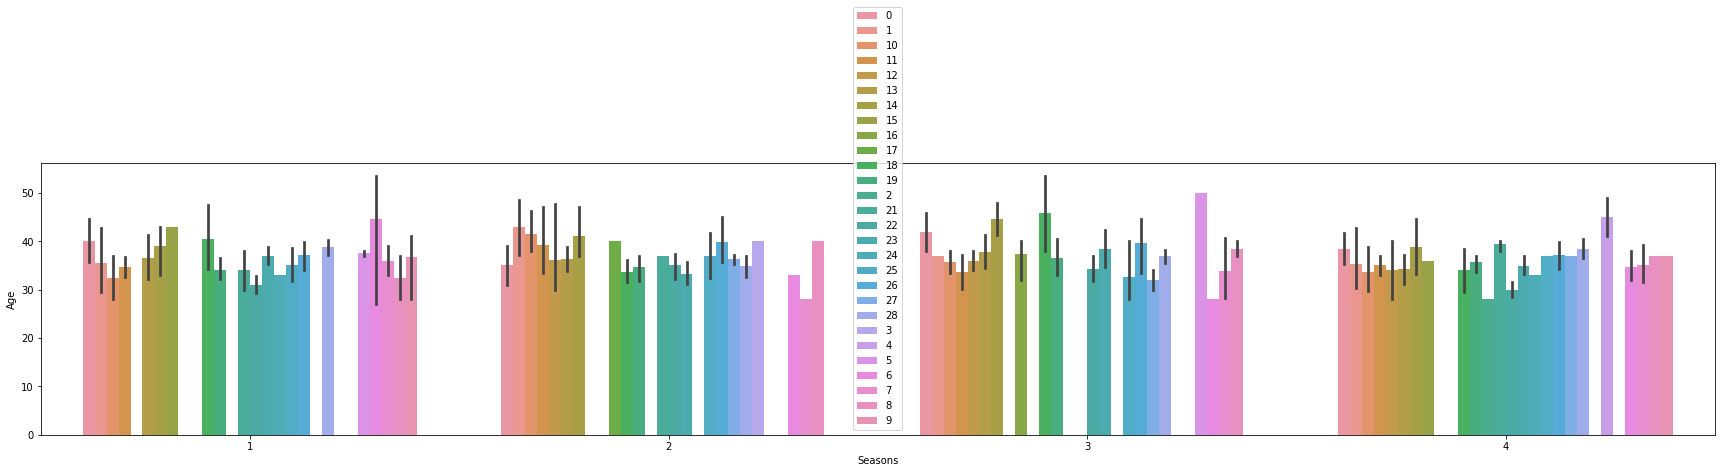

In [50]:
plt.figure(figsize=[30,5])
sb.barplot(x='Seasons',y='Age',hue='Reason for absence',data=d1)
plt.legend(loc='best');

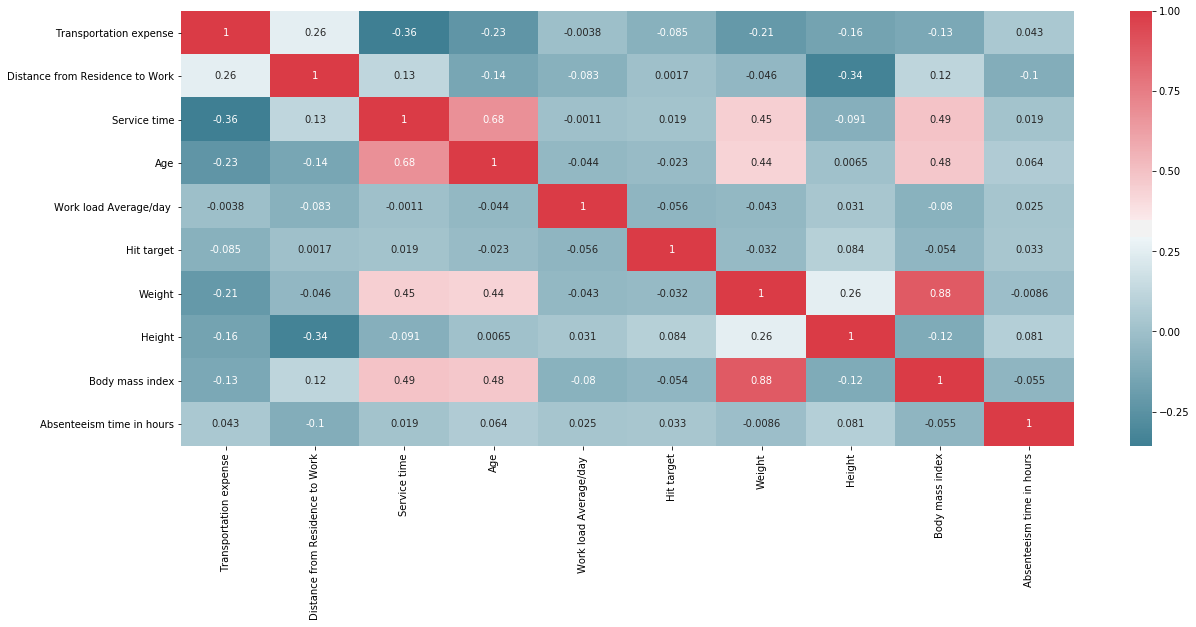

In [51]:
import seaborn as sb
f, ax = plt.subplots(figsize=(20, 8))
corr = d1.corr()
sb.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220, 10, as_cmap=True),annot=True,ax=ax,);

In [52]:
from scipy import stats
cat_names=['Reason for absence','Month of absence','Education','Social drinker','Social smoker','Seasons','Disciplinary failure','Day of the week','Pet','Son']
for i in cat_names:
    f, p = stats.f_oneway(d1[i], d1["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable Reason for absence is 2.85299534922044e-88
P value for variable Month of absence is 0.22859687189411457
P value for variable Education is 8.292743655867822e-29
P value for variable Social drinker is 5.7870409830809054e-36
P value for variable Social smoker is 2.7742582605911144e-41
P value for variable Seasons is 3.8393046151136395e-18
P value for variable Disciplinary failure is 1.6473375572712707e-41
P value for variable Day of the week is 2.643503584567156e-09
P value for variable Pet is 6.35495088656517e-34
P value for variable Son is 2.539330378162696e-31


In [53]:
d1=d1.drop(['Weight','Month of absence'],axis=1)

In [54]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 19 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet                                740 non-null object
Height   

In [55]:
d=d1.copy()

# Feature Scaling

In [56]:
# Checking for normality of continuous variables

In [57]:
cnames

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index']

In [58]:
# Updating continuous columns list 
cnames=['Transportation expense','Distance from Residence to Work','Age','Work load Average/day ','Hit target','Height','Body mass index',
        'Absenteeism time in hours']

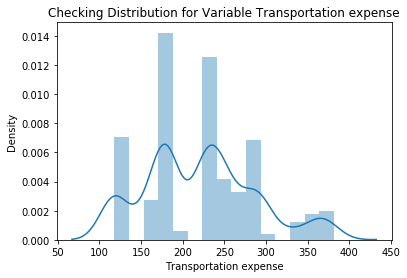

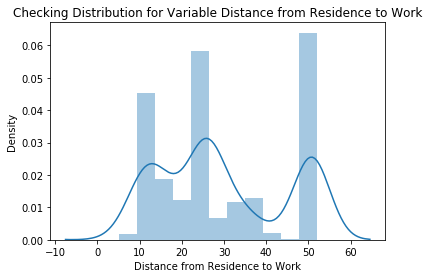

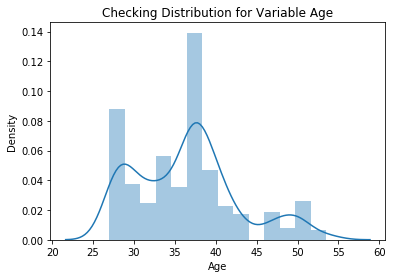

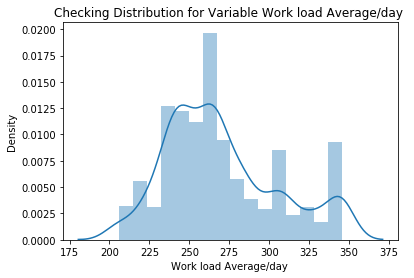

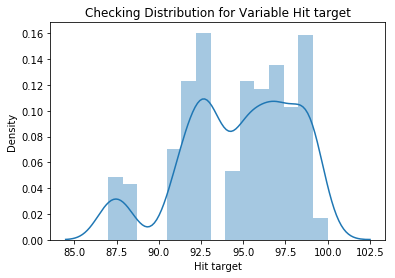

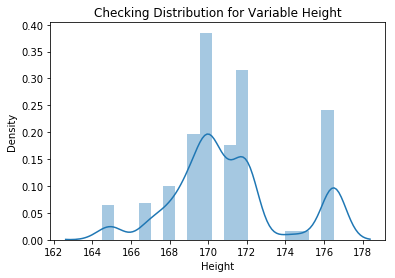

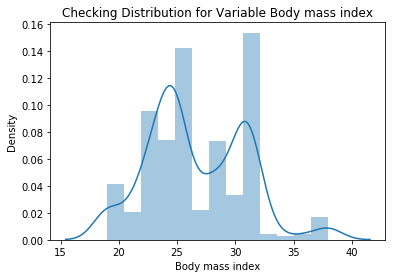

In [59]:
for i in cnames:
    if i == 'Absenteeism time in hours':
        continue
    sb.distplot(d1[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [60]:
# As all of the below variables appear not nomalised so we need to normalise all the variables except the target variable

In [61]:
for i in cnames:
    if i == 'Absenteeism time in hours':
        continue
    d1[i] = (d1[i] - d1[i].min())/(d1[i].max()-d1[i].min())

In [62]:
d1.head(3)

,ID,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11,23,3,1,0.406072,0.446809,13.0,0.377358,0.417746,0.615385,0,1,1,1,0,0,0.458333,0.315789,3.0
1,36,0,3,1,0.000000,0.170213,18.0,0.867925,0.240892,0.769231,1,1,1,1,0,0,1.000000,0.631579,0.0
2,3,23,4,1,0.231499,0.978723,18.0,0.415094,0.240892,0.769231,0,1,0,1,0,0,0.458333,0.631579,2.0


### Machine Learning

In [63]:
cat_names

['Reason for absence',
 'Month of absence',
 'Education',
 'Social drinker',
 'Social smoker',
 'Seasons',
 'Disciplinary failure',
 'Day of the week',
 'Pet',
 'Son']

In [64]:
cat_names=['Reason for absence','Education','Social drinker','Social smoker','Seasons','Disciplinary failure','Day of the week','Pet','Son']

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null object
Reason for absence                 740 non-null object
Month of absence                   740 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null object
Education                          740 non-null object
Son                                740 non-null object
Social drinker                     740 non-null object
Social smoker                      740 non-null object
Pet      

In [109]:
# Adding dummies for categorical variables and simlutaneously deleting the first dummy variable so as to avoid
# linear dependency.
d1_new=pd.get_dummies(data=d1,columns=cat_names,drop_first=True)

In [110]:
d1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 59 columns):
ID                                 740 non-null object
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Height                             740 non-null float64
Body mass index                    740 non-null float64
Absenteeism time in hours          740 non-null float64
Reason for absence_1               740 non-null uint8
Reason for absence_10              740 non-null uint8
Reason for absence_11              740 non-null uint8
Reason for absence_12              740 non-null uint8
Reason for absence_13              740 non-null uint8
Reason for absence_14              740 non-null uint8
Reason for a

In [112]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [125]:
d1_new.columns

Index(['ID', 'Transportationexpense', 'DistancefromResidencetoWork',
       'Servicetime', 'Age', 'WorkloadAverageday', 'Hittarget', 'Height',
       'Bodymassindex', 'Absenteeismtimeinhours', 'Reasonforabsence_1',
       'Reasonforabsence_10', 'Reasonforabsence_11', 'Reasonforabsence_12',
       'Reasonforabsence_13', 'Reasonforabsence_14', 'Reasonforabsence_15',
       'Reasonforabsence_16', 'Reasonforabsence_17', 'Reasonforabsence_18',
       'Reasonforabsence_19', 'Reasonforabsence_2', 'Reasonforabsence_21',
       'Reasonforabsence_22', 'Reasonforabsence_23', 'Reasonforabsence_24',
       'Reasonforabsence_25', 'Reasonforabsence_26', 'Reasonforabsence_27',
       'Reasonforabsence_28', 'Reasonforabsence_3', 'Reasonforabsence_4',
       'Reasonforabsence_5', 'Reasonforabsence_6', 'Reasonforabsence_7',
       'Reasonforabsence_8', 'Reasonforabsence_9', 'Education_2',
       'Education_3', 'Education_4', 'Socialdrinker_1', 'Socialsmoker_1',
       'Seasons_2', 'Seasons_3', 'Seasons_4

In [126]:
f=d1_new[['Transportationexpense', 'DistancefromResidencetoWork',
       'Servicetime', 'Age', 'WorkloadAverageday', 'Hittarget', 'Height',
       'Bodymassindex', 'Absenteeismtimeinhours', 'Reasonforabsence_1',
       'Reasonforabsence_10', 'Reasonforabsence_11',
       'Reasonforabsence_12', 'Reasonforabsence_13',
       'Reasonforabsence_14', 'Reasonforabsence_15',
       'Reasonforabsence_16', 'Reasonforabsence_17',
       'Reasonforabsence_18', 'Reasonforabsence_19',
       'Reasonforabsence_2', 'Reasonforabsence_21',
       'Reasonforabsence_22', 'Reasonforabsence_23',
       'Reasonforabsence_24', 'Reasonforabsence_25',
       'Reasonforabsence_26', 'Reasonforabsence_27',
       'Reasonforabsence_28', 'Reasonforabsence_3', 'Reasonforabsence_4',
       'Reasonforabsence_5', 'Reasonforabsence_6', 'Reasonforabsence_7',
       'Reasonforabsence_8', 'Reasonforabsence_9', 'Education_2',
       'Education_3', 'Education_4', 'Socialdrinker_1', 'Socialsmoker_1',
       'Seasons_2', 'Seasons_3', 'Seasons_4', 'Disciplinaryfailure_1',
       'Dayoftheweek_3', 'Dayoftheweek_4', 'Dayoftheweek_5',
       'Dayoftheweek_6', 'Pet_1', 'Pet_2', 'Pet_4', 'Pet_5', 'Pet_8',
       'Son_1', 'Son_2', 'Son_3', 'Son_4']]

In [127]:
model = forward_selected(f, 'Absenteeismtimeinhours')

In [ ]:
model = forward_selected(data, 'sl')

In [128]:
print(model.model.formula)

Absenteeismtimeinhours ~ Reasonforabsence_19 + Reasonforabsence_9 + Reasonforabsence_13 + Reasonforabsence_12 + Son_2 + Reasonforabsence_6 + Reasonforabsence_10 + Dayoftheweek_5 + DistancefromResidencetoWork + Socialdrinker_1 + Reasonforabsence_1 + Reasonforabsence_18 + Reasonforabsence_7 + Reasonforabsence_2 + Pet_8 + Reasonforabsence_22 + Reasonforabsence_11 + Reasonforabsence_14 + Education_4 + Hittarget + Bodymassindex + Age + Reasonforabsence_26 + Dayoftheweek_6 + WorkloadAverageday + Dayoftheweek_4 + Pet_2 + Son_3 + 1


In [129]:
print(model.rsquared_adj)

0.2097276661174282


In [68]:
from sklearn.model_selection import train_test_split

In [111]:
d1_new.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'Reason for absence_1',
       'Reason for absence_10', 'Reason for absence_11',
       'Reason for absence_12', 'Reason for absence_13',
       'Reason for absence_14', 'Reason for absence_15',
       'Reason for absence_16', 'Reason for absence_17',
       'Reason for absence_18', 'Reason for absence_19',
       'Reason for absence_2', 'Reason for absence_21',
       'Reason for absence_22', 'Reason for absence_23',
       'Reason for absence_24', 'Reason for absence_25',
       'Reason for absence_26', 'Reason for absence_27',
       'Reason for absence_28', 'Reason for absence_3', 'Reason for absence_4',
       'Reason for absence_5', 'Reason for absence_6', 'Reason for absence_7',
       'Reason for absence_8', 'Reason for absence_9', 'Education_2',
       'Education_3', 'Edu

In [70]:
X=d1_new[['Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Reason for absence_1',
       'Reason for absence_10', 'Reason for absence_11',
       'Reason for absence_12', 'Reason for absence_13',
       'Reason for absence_14', 'Reason for absence_15',
       'Reason for absence_16', 'Reason for absence_17',
       'Reason for absence_18', 'Reason for absence_19',
       'Reason for absence_2', 'Reason for absence_21',
       'Reason for absence_22', 'Reason for absence_23',
       'Reason for absence_24', 'Reason for absence_25',
       'Reason for absence_26', 'Reason for absence_27',
       'Reason for absence_28', 'Reason for absence_3', 'Reason for absence_4',
       'Reason for absence_5', 'Reason for absence_6', 'Reason for absence_7',
       'Reason for absence_8', 'Reason for absence_9', 'Education_2',
       'Education_3', 'Education_4', 'Social drinker_1', 'Social smoker_1',
       'Seasons_2', 'Seasons_3', 'Seasons_4', 'Disciplinary failure_1',
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Pet_1', 'Pet_2', 'Pet_4', 'Pet_5', 'Pet_8',
       'Son_1', 'Son_2', 'Son_3', 'Son_4']]
y=d1_new['Absenteeism time in hours']       

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.20, random_state = 1)

In [72]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [73]:
X_train.shape

(592, 56)

In [74]:
regressor = DecisionTreeRegressor(random_state = 1,max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [75]:
# Importing the error metric
from sklearn.metrics import mean_squared_error

In [76]:
# Predicting on training and testing set
pred_DT_test=regressor.predict(X_test)
pred_DT_train=regressor.predict(X_train)

In [77]:
# RMSE for training set
np.sqrt(mean_squared_error(y_train,pred_DT_train))

12.400605236370676

In [78]:
# RMSE for testing set
np.sqrt(mean_squared_error(y_test,pred_DT_test))

12.30064976324979

In [79]:
from sklearn.metrics import r2_score

In [80]:
# R-squared for DT
r2_score(y_test, pred_DT_test)

0.0578742239067882

In [81]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=500,random_state=1)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [82]:
# Predicting on training and testing set
pred_RF_train=reg.predict(X_train)
pred_RF_test=reg.predict(X_test)

In [83]:
# RMSE on training set
np.sqrt(mean_squared_error(y_train,pred_RF_train))

5.656788711545536

In [84]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_RF_test))

12.622040505108775

In [85]:
# R-squared for Random forest
r2_score(y_test, pred_RF_test)

0.007999435938828237

In [86]:
# Linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
# Predicting on training and testing set
pred_LR_test=reg.predict(X_test)
pred_LR_train=reg.predict(X_train)

In [88]:
# R squared for Linear Regression
r2_score(y_test, pred_LR_test)

0.07969608561618569

In [89]:
# RMSE on Training set
np.sqrt(mean_squared_error(y_train,pred_LR_train))

11.57297818959483

In [90]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_LR_test))

12.157359090633411

In [91]:
# XGBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
# Training the algorithm
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [93]:
# Predicting and calculating RMSE on training set
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [94]:
# RMSE on training set
rmse_for_train

6.895523239048484

In [95]:
# Predicting on test set
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [96]:
# RMSE on testing set
rmse_for_test

12.974901524714975

In [97]:
# R squared for XGBoost Regressor
r2_score(y_test,pred_test)

-0.0482404653350621

In [98]:
y=d1_new['Absenteeism time in hours']

In [99]:
d1_new.drop(['Absenteeism time in hours'], inplace = True, axis=1)
d1_new.shape

(740, 58)

In [100]:
# Support Vector Regressor
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
regressor.fit(X_train,y_train)
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [101]:
# RMSE on training set
rmse_for_train =np.sqrt(mean_squared_error(y_train,y_pred_train))

In [102]:
# RMSE on testing set
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred_test))

In [103]:
# R squared for SVR
r2_score(y_test,y_pred_test)

0.0729599210943197

In [104]:
# RMSE on training set
rmse_for_train

13.0240643593201

In [105]:
# RMSE on testing set
rmse_for_test

12.201770865872033

In [106]:
# Checking the shape of existing data
d1_new.shape

(740, 58)

In [107]:
d1_new.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Reason for absence_1', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_15', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_2',
       'Reason for absence_21', 'Reason for absence_22',
       'Reason for absence_23', 'Reason for absence_24',
       'Reason for absence_25', 'Reason for absence_26',
       'Reason for absence_27', 'Reason for absence_28',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_5',
       'Reason for absence_6', 'Reason for absence_7', 'Reason for absence_8',
       'Reason for absence_9', 'Education_2', 'Education_3', 'Education_4',
       'Social drinker_1'

In [108]:
X=d1_new[['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Reason for absence_1', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_15', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_2',
       'Reason for absence_21', 'Reason for absence_22',
       'Reason for absence_23', 'Reason for absence_24',
       'Reason for absence_25', 'Reason for absence_26',
       'Reason for absence_27', 'Reason for absence_28',
       'Reason for absence_3', 'Reason for absence_4', 'Reason for absence_5',
       'Reason for absence_6', 'Reason for absence_7', 'Reason for absence_8',
       'Reason for absence_9', 'Education_2', 'Education_3', 'Education_4',
       'Social drinker_1', 'Social smoker_1', 'Seasons_2', 'Seasons_3',
       'Seasons_4', 'Disciplinary failure_1', 'Day of the week_3',
       'Day of the week_4', 'Day of the week_5', 'Day of the week_6', 'Pet_1',
       'Pet_2', 'Pet_4', 'Pet_5', 'Pet_8', 'Son_1', 'Son_2', 'Son_3', 'Son_4']]

In [0]:
type(X)

pandas.core.frame.DataFrame

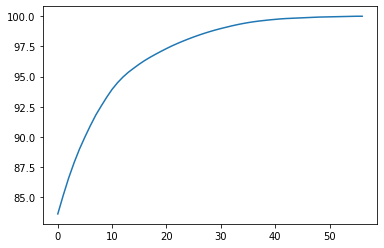

In [0]:
# Principal Component Analysis for reducing the number of variables.
from sklearn.decomposition import PCA

# Converting data to numpy array
X = X.values

# Data has 57 variables so no of components of PCA = 57
pca = PCA(n_components=57)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [0]:
# As 20 components explain 95%+ values so taking n_components = 20
pca = PCA(n_components=20)
X=pca.fit_transform(X)
explained_variance=pca.explained_variance_ratio_
explained_variance

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [0]:
X.shape

(740, 20)

In [0]:
# Decision Tree after PCA
regressor = DecisionTreeRegressor(random_state=1,max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [0]:
# Predicting the results
pred_DT_test=regressor.predict(X_test)
pred_DT_train=regressor.predict(X_train)

In [0]:
# RMSE on training set
np.sqrt(mean_squared_error(y_train,pred_DT_train))

11.27429342028231

In [0]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_DT_test))

17.18050955357233

In [0]:
# R squared for Decision Tree after PCA
r2_score(y_test, pred_DT_test)

-0.14653483834785486

In [0]:
# Random Forest after PCA
reg=RandomForestRegressor(n_estimators=500)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# Predicting the results
pred_RF_train=reg.predict(X_train)
pred_RF_test=reg.predict(X_test)

In [0]:
# RMSE on training set
np.sqrt(mean_squared_error(y_train,pred_RF_train))

4.942491702795511

In [0]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_RF_test))

15.812776720900821

In [0]:
# R squared for Random FOrest after PCA
r2_score(y_test, pred_RF_test)

0.02874905966587138

In [0]:
# Linear regression after PCA
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting the results
pred_LR_test=reg.predict(X_test)
pred_LR_train=reg.predict(X_train)

In [0]:
# R squared on Linear Regression after PCA
r2_score(y_test, pred_LR_test)

0.11275517354688935

In [0]:
# RMSE on training set
np.sqrt(mean_squared_error(y_train,pred_LR_train))

11.67197382868209

In [0]:
# RMSE on testing set
np.sqrt(mean_squared_error(y_test,pred_LR_test))

15.113468679785036

In [0]:
# XGBoost Regressor after PCA
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [0]:
# PRedicting the results
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [0]:
# RMSE on training set
rmse_for_train

4.35419938986703

In [0]:
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

In [0]:
# RMSE on testing set
rmse_for_test

16.915124749540052

In [0]:
# R squared on XGBoost after PCA
r2_score(y_test,pred_test)

-0.1113876975831114

In [0]:
X.shape

(740, 20)

In [0]:
# SVR after PCA
regressor=SVR(kernel='linear')
regressor.fit(X_train,y_train)
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [0]:
rmse_for_train =np.sqrt(mean_squared_error(y_train,y_pred_train))

In [0]:
rmse_for_test =np.sqrt(mean_squared_error(y_test,y_pred_test))

In [0]:
# R squared on SVR after PCA
r2_score(y_test,y_pred_test)

0.018662295999574585

In [0]:
# RMSE on training set
rmse_for_train

12.21530543879675

In [0]:
# RMSE on testing set
rmse_for_test

15.894675104282145